In [101]:
import pandas as pd

In [102]:
df = pd.read_csv('Houses-Price-cairo-Egypt.csv')
df

,Property_price_EGP,Location_governorate,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM,Furnished,Property_Type,Payment_Option,Delivery_Date
0,"2,700,000",Cairo,New Cairo - El Tagamoa,3,2.0,200,No,Apartment,Cash,Ready To Move
1,"2,700,000",Cairo,Tura,2,2.0,210,No,Apartment,Cash,Ready To Move
2,"2,100,000",Cairo,Helwan,3,2.0,200,No,Apartment,Cash,Ready To Move
3,"16,500,000",Cairo,Maadi,4,5.0,575,No,Apartment,Cash,Ready To Move
4,"2,750,000",Cairo,New Cairo - El Tagamoa,3,2.0,200,No,Apartment,Cash,Ready To Move
...,...,...,...,...,...,...,...,...,...,...
940,"2,000,000",Cairo,Rehab City,2,1.0,90,No,Apartment,Cash,Ready To Move
941,"4,500,000Negotiable",NaN,211 SQM,33icon/categories/area211 SQM,NaN,icon/categories/area211,No,Apartment,Cash,Ready To Move
942,"4,500,000",Cairo,Rehab City,3,3.0,211,No,Apartment,Cash,Ready To Move
943,"2,100,000",Cairo,Madinaty,2,1.0,78,No,Apartment,Cash,Ready To Move


In [103]:
rows_to_select = ['Location_City','Bed_Rooms','Bath_Rooms', 'Home_Space_SQM','Property_price_EGP']
df = df[rows_to_select]
df

,Location_City,Bed_Rooms,Bath_Rooms,Home_Space_SQM,Property_price_EGP
0,New Cairo - El Tagamoa,3,2.0,200,"2,700,000"
1,Tura,2,2.0,210,"2,700,000"
2,Helwan,3,2.0,200,"2,100,000"
3,Maadi,4,5.0,575,"16,500,000"
4,New Cairo - El Tagamoa,3,2.0,200,"2,750,000"
...,...,...,...,...,...
940,Rehab City,2,1.0,90,"2,000,000"
941,211 SQM,33icon/categories/area211 SQM,NaN,icon/categories/area211,"4,500,000Negotiable"
942,Rehab City,3,3.0,211,"4,500,000"
943,Madinaty,2,1.0,78,"2,100,000"


In [104]:
print(df['Location_City'].value_counts())

Location_City
Madinaty                  253
New Cairo - El Tagamoa    201
Rehab City                 92
Nasr City                  58
Maadi                      22
                         ... 
330 SQM                     1
197 SQM                     1
107 SQM                     1
215 SQM                     1
139 SQM                     1
Name: count, Length: 112, dtype: int64


In [105]:
nasr_city = df[df['Location_City'] == 'Nasr City']
nasr_city = nasr_city.sort_values(by='Property_price_EGP').reset_index()

In [106]:
nasr_city = nasr_city.drop(['Location_City', 'index'], axis=1).replace(',','', regex=True)
nasr_city = nasr_city.astype(int)
nasr_city

,Bed_Rooms,Bath_Rooms,Home_Space_SQM,Property_price_EGP
0,2,1,60,1200000
1,2,2,120,1200000
2,3,1,115,1300000
3,2,2,150,1400000
4,2,2,125,1400000
5,3,1,150,1500000
6,3,1,120,1500000
7,2,2,160,1550000
8,3,2,190,1600000
9,3,1,120,1600000


In [107]:
filtered_nasr_city = pd.DataFrame(columns=nasr_city.columns)
filtered_nasr_city = pd.concat([filtered_nasr_city, nasr_city.iloc[[0]]], ignore_index=True)
filtered_nasr_city

,Bed_Rooms,Bath_Rooms,Home_Space_SQM,Property_price_EGP
0,2,1,60,1200000


In [108]:
for i in range(1, len(nasr_city)):
    if (nasr_city.iloc[i] > filtered_nasr_city.iloc[-1]).all():
        filtered_nasr_city = pd.concat([filtered_nasr_city, nasr_city.iloc[[i]]], ignore_index=True)

filtered_nasr_city

,Bed_Rooms,Bath_Rooms,Home_Space_SQM,Property_price_EGP
0,2,1,60,1200000
1,3,2,190,1600000
2,4,3,300,3400000
3,6,4,450,3750000


In [109]:
nasr_city = filtered_nasr_city.copy(deep=True)
new_columns = ['الغرف', 'الحمامات', 'المساحة', 'السعر']
nasr_city.columns = new_columns
nasr_city['السعر'] = nasr_city['السعر'].apply(lambda x: f"{x:,}")
# filtered_nasr_city.drop([0], inplace=True)

In [110]:
nasr_city.style.hide(axis="index") 

الغرف,الحمامات,المساحة,السعر
2,1,60,"1,200,000"
3,2,190,"1,600,000"
4,3,300,"3,400,000"
6,4,450,"3,750,000"


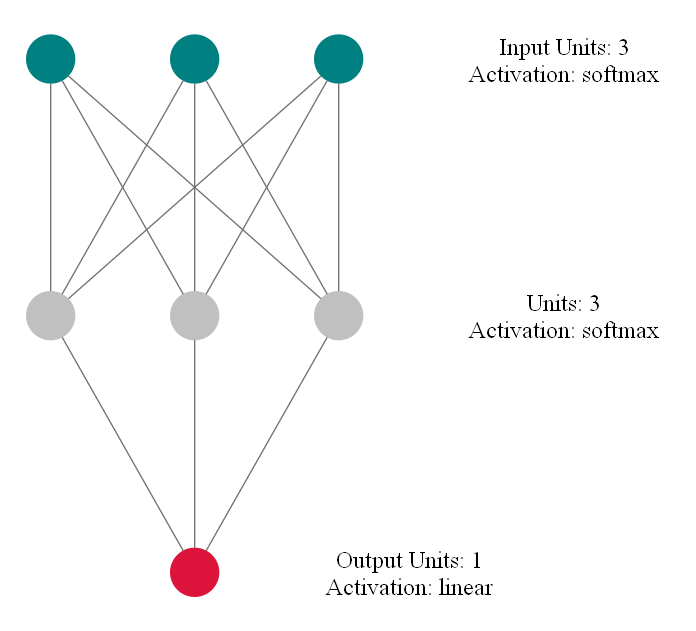

In [7]:
from keras import models, layers
from keras_visualizer import visualizer
import IPython

model = models.Sequential([
    layers.Input((3,)),
    layers.Dense(3, activation='softmax'),
    layers.Dense(1)

])

my_settings = {
    'MAX_NEURONS': None,
    'INPUT_DENSE_COLOR': 'teal',
    'HIDDEN_DENSE_COLOR': 'gray',
    'OUTPUT_DENSE_COLOR': 'crimson'
}


# model.summary()
visualizer(model, file_name='neural_network', file_format='dot', settings=my_settings)

# IPython.display.Image(filename='neural_network.png', width=200, height=200)

In [9]:
# Read the .dot file
with open('neural_network', 'r') as file:
    lines = file.readlines()

# Modify the lines to remove labels and set the direction to LR
new_lines = []
for line in lines:
    if 'label=' not in line:
        new_lines.append(line)
    if 'graph [' in line:
        new_lines.append('    rankdir=LR;\n')

with open('model_no_labels_LR.dot', 'w') as file:
    file.writelines(new_lines)

import os
os.system('dot -Tpng model_no_labels_LR.dot -o model_no_labels_LR.png')

1

nn_test.png


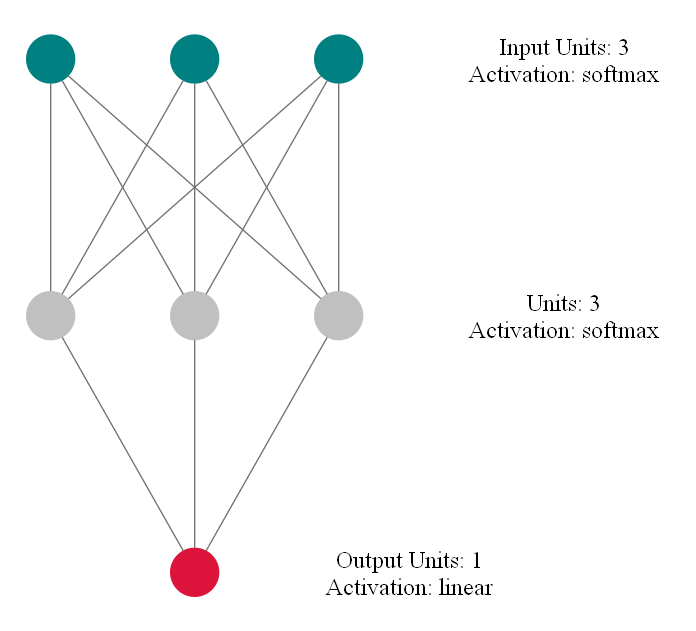

In [6]:
import graphviz
import IPython

# Load the .dot file
with open('neural_network', 'r') as file:
    dot_data = file.read()

# Create a Graphviz source object
dot = graphviz.Source(dot_data)

# Render the graph to a file (e.g., PNG format)
path = dot.render('nn_test', format='png', cleanup=True)
print(path)
IPython.display.Image(filename='nn_test.png', width=200, height=200)